In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

In [3]:
# Open the NetCDF file using xarray
ds = xr.open_dataset('data/Serengeti_tamsat.nc')
ds = ds.sel(time=slice('2016-10', '2017-09'))

ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'h5netcdf']. But their dependencies may not be installed, see:
https://docs.xarray.dev/en/stable/user-guide/io.html 
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html

In [3]:
ds.rio.set_spatial_dims('lon','lat',inplace=True)
ds.rio.write_crs('EPSG:4326',inplace=True)
ds = ds.rio.reproject("EPSG:21036")
ds

<xarray.Dataset>
Dimensions:      (x: 136, y: 134, time: 365)
Coordinates:
  * x            (x) float64 3.872e+05 3.914e+05 ... 9.446e+05 9.487e+05
  * y            (y) float64 1e+07 9.996e+06 9.992e+06 ... 9.451e+06 9.447e+06
  * time         (time) datetime64[ns] 2016-10-01 2016-10-02 ... 2017-09-30
    spatial_ref  int64 0
Data variables:
    rfe          (time, y, x) float32 16.9 17.0 17.9 19.2 ... 0.0 0.0 0.0 nan
    rfe_filled   (time, y, x) float32 16.9 17.0 17.9 19.2 ... 0.0 0.0 0.0 nan
Attributes:
    Conventions:  CF-1.6
    CreatedBy:    EDAL Libraries
    MoreInfo:     https://github.com/Reading-eScience-Centre/edal-java

In [ ]:
ds.rfe.plot(col='time', col_wrap=5, add_colorbar=False )

In [4]:
# Define the threshold value
threshold = 0.0

# Find the time, latitude, and longitude when rainfall is above the threshold
ds_masked = ds['rfe'].where(ds['rfe'] > threshold, drop=False)
ds_masked

<xarray.DataArray 'rfe' (time: 365, y: 134, x: 136)>
array([[[16.9, 17. , 17.9, ...,  2.7,  nan,  nan],
        [16.2, 17.2, 18.3, ...,  2.3,  nan,  nan],
        [12.8, 15. , 15.2, ...,  6.3,  4.9,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ 7.4,  6.4,  5.6, ...,  2.7,  5.4, 10.2],
        [ 8.1,  7.5,  6.5, ...,  4.5,  5.4, 11.3],
        [ 8.9, 10.4,  9.8, ...,  nan,  2.4,  7.5],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[14.8, 12.7, 13.4, ...,  nan,  nan,  nan],
        [14.2, 12.9, 12.9, ...,  nan,  nan,  nan],
        [13.8, 13.8, 10.9, ...,  nan,  nan,  nan],
        ...,
...
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ 2.2,  2.5,  nan, ...,  nan,  nan,  nan],
        [ 4. ,  4.3,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 3.872e+05 3.914e+05 ... 9.446e+05 9.487e+05
  * y            (y) float64 1e+07 9.996e+06 9.992e+06 ... 9.451e+06 9.447e+06
  * time         (time) datetime64[ns] 2016-10-01 2016-10-02 ... 2017-09-30
    spatial_ref  int64 0
Attributes:
    units:          mm
    standard_name:  Rainfall Estimate
    long_name:      Rainfall Estimate

In [5]:
file = "data/wb_1day_Serengeti.csv"
dfa = pd.read_csv(file, dtype=None)

dfa['time1'] = pd.to_datetime(dfa['t1_'])
dfa['date1'] = pd.to_datetime(dfa['time1'].dt.date)
dfa['time2'] = pd.to_datetime(dfa['t2_'])
dfa['date2'] = pd.to_datetime(dfa['time2'].dt.date)

#start_date = pd.to_datetime('2013-11-01').date()
#end_date = pd.to_datetime('2014-01-31').date()

# Subset the DataFrame by the date range
dfa.set_index('date1', inplace=True)

#df = df['2013-11-11':'2013-11-16']

/tmp/ipykernel_198/85174987.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('magma', len(unique_ids))


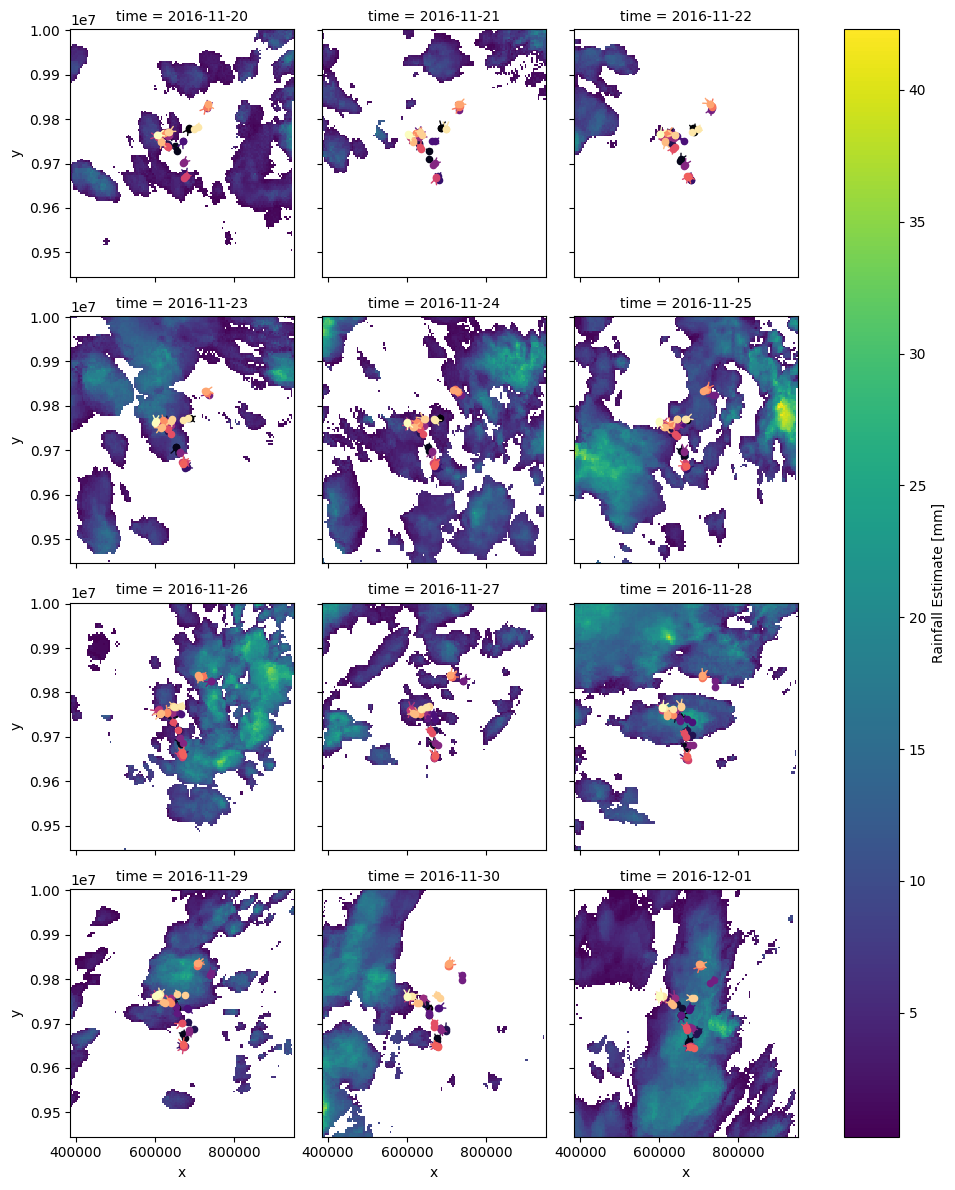

In [6]:
from matplotlib.patches import FancyArrowPatch

dfs = dfa['2016-11-20':'2016-12-01']
dm = ds_masked.sel(time=slice('2016-11-20', '2016-12-01'))
dm.plot(col='time', col_wrap=3 )

# Get the list of axes from the xarray subplot grid
axes = plt.gcf().get_axes()

# Extract unique IDs from the GPS data
unique_ids = dfs['ID'].unique()

# Define a mapping between IDs and colors
id_color_map = {}
colors = plt.cm.get_cmap('magma', len(unique_ids))

for i, id in enumerate(unique_ids):
    id_color_map[id] = colors(i)

# Overlay GPS data on each subplot, coloring by ID and case_
for i, ax in enumerate(axes):
    if i < len(dm['time']):  # Check if the index is within bounds
        # Extract the time for the current subplot
        current_time = dm['time'][i].values
        
        # Filter GPS data for the current time using .loc
        gps_data_subset = dfs.loc[dfs.index == current_time]
        
        # Iterate over unique IDs and plot each group with a unique color
        for id in unique_ids:
            id_subset = gps_data_subset[gps_data_subset['ID'] == id]
            color = id_color_map[id]
            # Separate the data based on 'case_' values
            case_true_data = id_subset[id_subset['case_']]
            case_false_data = id_subset[~id_subset['case_']]
            # Plot the first set of X and Y data (x1_ and y1_) with different colors
            ax.scatter(case_true_data['x1_'], case_true_data['y1_'], color=color, label=f'ID {id} (Case True)', s=20)
            #ax.scatter(case_false_data['x1_'], case_false_data['y1_'], color=color, label=f'ID {id} (Case False)', s=20)
            # Plot the second set of X and Y data (x2_ and y2_) with different colors
            ax.scatter(case_true_data['x2_'], case_true_data['y2_'], color=color, s=20)
            #ax.scatter(case_false_data['x2_'], case_false_data['y2_'], color=color, s=20)
            # Connect the points with lines for both sets of data
            for index, row in case_true_data.iterrows():
                ax.add_patch(FancyArrowPatch((row['x1_'], row['y1_']), (row['x2_'], row['y2_']),
                                             arrowstyle='->', color=color, mutation_scale=10))
            #for index, row in case_false_data.iterrows():
                #ax.add_patch(FancyArrowPatch((row['x1_'], row['y1_']), (row['x2_'], row['y2_']),
                                             #arrowstyle='->', color='grey', mutation_scale=15))
        
        # Set the x and y axis limits for zooming
        #ax.set_xlim(596742, 821598)
        #ax.set_ylim(9608997.0, 9879023)
        #ax.legend()
        #ax.set_title(f'GPS Data Overlay at Time {current_time}')

# Show the plot
plt.show()


In [7]:
# Convert the xarray DataArray to a Pandas DataFrame
rain = ds_masked.to_dataframe().reset_index()

rain = rain.dropna()
rain['date'] = pd.to_datetime(rain['time'].dt.date)

# Print the DataFrame
#rain.set_index('date', inplace=True) 
#rain

In [8]:
dfs = dfa['2016-11-20':'2016-12-01']
dm = ds_masked.sel(time=slice('2016-11-20', '2016-12-01'))

In [9]:
## datasets for cloud calculation
df = dfa.reset_index()
#df = dfs.reset_index()
rain = ds_masked.to_dataframe().reset_index()
#rain = dm.to_dataframe().reset_index()

rain = rain.dropna()
rain['date'] = pd.to_datetime(rain['time'].dt.date)

df2 = rain#.reset_index()

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from concurrent.futures import ProcessPoolExecutor
from tqdm.notebook import tqdm  # Import tqdm for Jupyter Lab progress bars

# Define a function to find the 5 nearest clouds with threshold constraints
def find_5_nearest_clouds(row, df2, threshold_mm=5):
    subset = df2[df2['date'] == row['date1']]
    
    if len(subset) == 0:
        return []  # Return an empty list if there are no matching clouds
    
    # Calculate distances to all clouds
    distances = cdist(np.array([[row['x1_'], row['y1_']]]), subset[['x', 'y']], metric='euclidean')
    
    # Filter clouds that meet the threshold criteria
    valid_clouds = []
    for i, distance in enumerate(distances[0]):
        if subset.iloc[i]['rfe'] > threshold_mm:
            valid_clouds.append((i, distance))
    
    # Sort valid clouds by distance
    valid_clouds.sort(key=lambda x: x[1])
    
    # Return the top 5 valid clouds if available
    if len(valid_clouds) >= 5:
        return [subset.iloc[i[0]] for i in valid_clouds[:5]]
    else:
        return []

# Define a function to calculate the mean cloud coordinates for a row
def calculate_mean_cloud_coordinates_wrapper(args):
    row, df2 = args
    return calculate_mean_cloud_coordinates(row, df2)

def calculate_mean_cloud_coordinates(row, df2):
    nearest_cloud_list = find_5_nearest_clouds(row, df2)
    if nearest_cloud_list:
        cloud_coordinates = np.array([[cloud['x'], cloud['y']] for cloud in nearest_cloud_list])
        avg_cloud_x = np.nanmean(cloud_coordinates[:, 0])
        avg_cloud_y = np.nanmean(cloud_coordinates[:, 1])
        return avg_cloud_x, avg_cloud_y
    else:
        return np.nan, np.nan

# Use ProcessPoolExecutor to parallelize the processing
with ProcessPoolExecutor() as executor:
    # Create a list of rows from df1 as tuples for parallel processing
    rows_to_process = [(index, row) for index, row in df.iterrows()]
    
    # Use tqdm with notebook extension for animated progress bar
    result_iterator = tqdm(
        executor.map(calculate_mean_cloud_coordinates_wrapper, [(row, df2) for _, row in rows_to_process]),
        total=len(rows_to_process),
        desc='Processing df1',
        dynamic_ncols=True,  # Enable dynamic column width for a smoother progress bar
    )
    
    # Extract the results into separate lists
    mean_cloud_x, mean_cloud_y = zip(*result_iterator)

# Add the calculated mean x and y columns to df1
df['mean_cloud_x'] = mean_cloud_x
df['mean_cloud_y'] = mean_cloud_y


In [ ]:
df.to_csv('data/Serengeti_data2.csv', index=False)

In [ ]:
df.head()

# Next step

In [ ]:
# Define a function to find the 2 nearest clouds with threshold and distance constraints
def find_2_nearest_clouds(row, df2, threshold_mm=5, max_distance_m=100000):
    subset = df2[df2['date'] == row['date1']]
    
    if len(subset) == 0:
        return (None, None)  # Return None for both clouds if there are no matching clouds
    
    # Calculate distances to all clouds
    distances = cdist(np.array([[row['x1_'], row['y1_']]]), subset[['x', 'y']], metric='euclidean')
    
    # Filter clouds that meet the threshold and distance criteria
    valid_clouds = []
    for i, distance in enumerate(distances[0]):
        #if distance <= max_distance_m and subset.iloc[i]['rfe'] > threshold_mm:
        if subset.iloc[i]['rfe'] > threshold_mm:
            valid_clouds.append((i, distance))
    
    # Sort valid clouds by distance
    valid_clouds.sort(key=lambda x: x[1])
    
    # Return the top 2 valid clouds if available, or None for the missing ones
    if len(valid_clouds) >= 5:
        cloud1 = subset.iloc[valid_clouds[0][0]]
        cloud2 = subset.iloc[valid_clouds[1][0]]
        cloud3 = subset.iloc[valid_clouds[2][0]]
        cloud4 = subset.iloc[valid_clouds[3][0]]
        cloud5 = subset.iloc[valid_clouds[4][0]]
        return (cloud1, cloud2,cloud3,cloud4,cloud5)
    elif len(valid_clouds) == 1:
        cloud1 = subset.iloc[valid_clouds[0][0]]
        return (cloud1, None)
    elif len(valid_clouds) == 2:
        cloud2 = subset.iloc[valid_clouds[0][0]]
        return (cloud2, None)
    elif len(valid_clouds) == 3:
        cloud3 = subset.iloc[valid_clouds[0][0]]
        return (cloud3, None)
    elif len(valid_clouds) == 4:
        cloud4 = subset.iloc[valid_clouds[0][0]]
        return (cloud4, None)
    else:
        return (None, None)

# Iterate through df1 and populate the nearest cloud columns
nearest_cloud1 = []
nearest_cloud2 = []
nearest_cloud3 = []
nearest_cloud4 = []
nearest_cloud5 = []

for index, row in tqdm(df.iterrows(), total=len(df), desc='Processing df1'):
    cloud1, cloud2, cloud3, cloud4,cloud5 = find_2_nearest_clouds(row, df2)
    if cloud1 is not None:
        nearest_cloud1.append([cloud1['x'], cloud1['y'], cloud1['time'],cloud1['rfe']])
    else:
        nearest_cloud1.append([None, None, None, None])
        
    if cloud2 is not None:
        nearest_cloud2.append([cloud2['x'], cloud2['y'], cloud2['time'],cloud2['rfe']])
    else:
        nearest_cloud2.append([None, None, None, None])
        
    if cloud3 is not None:
        nearest_cloud3.append([cloud3['x'], cloud3['y'], cloud3['time'],cloud3['rfe']])
    else:
        nearest_cloud3.append([None, None, None, None])
        
    if cloud4 is not None:
        nearest_cloud4.append([cloud4['x'], cloud4['y'], cloud4['time'],cloud4['rfe']])
    else:
        nearest_cloud4.append([None, None, None, None])
        
    if cloud5 is not None:
        nearest_cloud5.append([cloud5['x'], cloud5['y'], cloud5['time'],cloud5['rfe']])
    else:
        nearest_cloud5.append([None, None, None, None])

# Convert the lists of nearest cloud properties into DataFrames
nearest_cloud1_df = pd.DataFrame(nearest_cloud1, columns=['cloud1_x', 'cloud1_y', 'cloud1_time','cloud1_rfe'])
nearest_cloud2_df = pd.DataFrame(nearest_cloud2, columns=['cloud2_x', 'cloud2_y', 'cloud2_time','cloud2_rfe'])
nearest_cloud3_df = pd.DataFrame(nearest_cloud3, columns=['cloud3_x', 'cloud3_y', 'cloud3_time','cloud3_rfe'])
nearest_cloud4_df = pd.DataFrame(nearest_cloud4, columns=['cloud4_x', 'cloud4_y', 'cloud4_time','cloud4_rfe'])
nearest_cloud5_df = pd.DataFrame(nearest_cloud5, columns=['cloud5_x', 'cloud5_y', 'cloud5_time','cloud5_rfe'])

# Concatenate df1 with the nearest cloud DataFrames
df = pd.concat([df, nearest_cloud1_df, nearest_cloud2_df,nearest_cloud3_df,nearest_cloud4_df,nearest_cloud5_df], axis=1)


In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from tqdm import tqdm
import multiprocessing

def find_nearest_clouds(row, df2, threshold_mm=5, max_distance_m=100000):
    subset = df2[df2['date'] == row['date1']]
    
    if len(subset) == 0:
        return None  # Return None if there are no matching clouds
    
    distances = cdist(np.array([[row['x1_'], row['y1_']]]), subset[['x', 'y']], metric='euclidean')
    
    valid_clouds = []
    for i, distance in enumerate(distances[0]):
        if subset.iloc[i]['rfe'] > threshold_mm and distance <= max_distance_m:
            valid_clouds.append((i, distance))
    
    valid_clouds.sort(key=lambda x: x[1])
    
    if len(valid_clouds) > 0:
        cloud = subset.iloc[valid_clouds[0][0]]
        return cloud
    else:
        return None

def process_threshold(threshold_mm, df, df2):
    nearest_clouds = []

    for index, row in tqdm(df.iterrows(), total=len(df), desc=f'Processing df1 (Threshold {threshold_mm})'):
        cloud = find_nearest_clouds(row, df2, threshold_mm=threshold_mm)
        if cloud is not None:
            nearest_clouds.append([cloud['x'], cloud['y'], cloud['rfe']])
        else:
            nearest_clouds.append([None, None, None])

    nearest_cloud_df = pd.DataFrame(nearest_clouds, columns=[f'cloud_{threshold_mm}mm_x', f'cloud_{threshold_mm}mm_y', f'cloud_{threshold_mm}mm_rfe'])
    
    return nearest_cloud_df

if __name__ == '__main__':
    thresholds = [5, 8, 10, 15]
    num_processes = multiprocessing.cpu_count()  # Use all available CPU cores

    # Split the DataFrame into chunks for parallel processing
    chunk_size = len(df) // num_processes
    chunks = [df[i:i + chunk_size] for i in range(0, len(df), chunk_size)]

    pool = multiprocessing.Pool(processes=num_processes)
    results = pool.starmap(process_threshold, [(threshold, chunk, df2) for threshold, chunk in zip(thresholds, chunks)])
    pool.close()
    pool.join()

    # Concatenate the results from different processes
    df = pd.concat([df] + results, axis=1)



In [ ]:
df.head()

In [10]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from tqdm import tqdm
import multiprocessing
from functools import partial

def find_nearest_clouds(row, df2, threshold_mm):
    subset = df2[df2['date'] == row['date1']]
    
    if len(subset) == 0:
        return None  # Return None if there are no matching clouds
    
    distances = cdist(np.array([[row['x1_'], row['y1_']]]), subset[['x', 'y']], metric='euclidean')
    
    valid_clouds = []
    for i, distance in enumerate(distances[0]):
        if subset.iloc[i]['rfe'] > threshold_mm: #and distance <= max_distance_m:
            valid_clouds.append((i, distance))
    
    valid_clouds.sort(key=lambda x: x[1])
    
    if len(valid_clouds) > 0:
        cloud = subset.iloc[valid_clouds[0][0]]
        return cloud
    else:
        return None

def process_threshold(threshold_mm, df, df2):
    nearest_clouds = []

    for index, row in tqdm(df.iterrows(), total=len(df), desc=f'Processing df1 (Threshold {threshold_mm})'):
        cloud = find_nearest_clouds(row, df2, threshold_mm=threshold_mm)
        if cloud is not None:
            nearest_clouds.append([cloud['x'], cloud['y'], cloud['rfe']])
        else:
            nearest_clouds.append([None, None, None])

    nearest_cloud_df = pd.DataFrame(nearest_clouds, columns=[f'cloud_{threshold_mm}mm_x', f'cloud_{threshold_mm}mm_y', f'cloud_{threshold_mm}mm_rfe'])
    
    return nearest_cloud_df

def calculate_turning_angles_for_threshold(args):
    index, row, threshold_mm = args  # Unpack the tuple to get the index, row, and threshold
    
    # Calculate vectors for trajectory and direction towards the cloud
    trajectory_vector = np.array([row['x2_'] - row['x1_'], row['y2_'] - row['y1_']])
    cloud_vector = np.array([row[f'cloud_{threshold_mm}mm_x'] - row['x1_'], row[f'cloud_{threshold_mm}mm_y'] - row['y1_']])
    
    # Calculate dot product and magnitudes
    dot_product = np.dot(trajectory_vector, cloud_vector) 
    magnitude_trajectory = np.linalg.norm(trajectory_vector)
    magnitude_cloud = np.linalg.norm(cloud_vector)
    
    # Check if the dot product is within valid range
    #if -1 <= dot_product <= 1:
        # Calculate turning angle in radians
    # Calculate the angle in radians
    if magnitude_trajectory != 0 and magnitude_cloud != 0:
        cos_angle = dot_product / (magnitude_trajectory * magnitude_cloud)
        if cos_angle > 1:
            cos_angle = 1  # To handle potential rounding errors
        elif cos_angle < -1:
            cos_angle = -1  # To handle potential rounding errors
        cloud_angle_radians = np.arccos(cos_angle)
    else:
        cloud_angle_radians = 0  # Handle division by zero or zero-magnitude vectors
 
    cloud_angle_degrees = np.degrees(cloud_angle_radians)
    
    # Calculate difference in turning angles
   # ta_diff = row['ta_'] - turning_angle_cloud_radians
    #angle_difference = (ta_diff + np.pi) % (2 * np.pi) - np.pi

    return magnitude_cloud, cloud_angle_radians, cloud_angle_degrees




In [ ]:
if __name__ == '__main__':
    thresholds = [5]#, 15]
    num_processes = multiprocessing.cpu_count()  # Use all available CPU cores
    # Split the DataFrame into chunks for parallel processing
    #chunk_size = len(df) #// num_processes
    #chunk_size = 200
    #chunks = [df[i:i + chunk_size] for i in range(0, len(df), chunk_size)]
    
    pool = multiprocessing.Pool(processes=num_processes)
    results = pool.starmap(process_threshold, [(threshold, df, df2) for threshold in thresholds])
    pool.close()
    pool.join()

    # Concatenate the results from different processes
    df = pd.concat([df] + results, axis=1)

    threshold_results = {}

    for threshold_mm in thresholds:
        with multiprocessing.Pool(processes=num_processes) as pool:
            args_list = [(index, row, threshold_mm) for index, row in df.iterrows()]
            turning_angle_results = list(tqdm(pool.map(calculate_turning_angles_for_threshold, args_list), total=len(df), desc=f'Calculating Turning Angles (Threshold {threshold_mm}mm)'))

        #direction_to_cloud_list, trajectory_vector_list, dot_product_list, magnitude_trajectory_list, magnitude_direction_to_cloud_list#, turning_angle_cloud_radians_list, turning_angle_cloud_degrees_list, angle_difference_list = zip(*turning_angle_results)
        magnitude_cloud_list, cloud_angle_radians_list, cloud_angle_degrees_list = zip(*turning_angle_results)
        
        # Add the results to the original DataFrame with column names indicating the threshold
        df[f'magnitude_cloud_{threshold_mm}mm'] = magnitude_cloud_list
        df[f'cloud_angle_radians_{threshold_mm}mm'] = cloud_angle_radians_list
        df[f'cloud_angle_degrees_{threshold_mm}mm'] = cloud_angle_degrees_list

        threshold_results[threshold_mm] = {
            'magnitude_cloud': magnitude_cloud_list,
            'cloud_angle_radians': cloud_angle_radians_list,
            'cloud_angle_degrees' : cloud_angle_degrees_list,
        }


    # You can access the results for each threshold from the `threshold_results` dictionary
    # Example: threshold_results[5]['turning_angle_cloud_degrees']


Processing df1 (Threshold 5):   5%|▍         | 4247/91025 [30:18<23:27:10,  1.03it/s]

In [ ]:
df

In [ ]:
from matplotlib.patches import FancyArrowPatch

#dfs = dfa['2013-11-20':'2013-11-27']
#df.set_index('date1', inplace=True)
#df = df['2016-11-20':'2016-11-27']
dfd = df[df['ID'] == 'SW37']
dfd.set_index('date1', inplace=True)
#dm = ds_masked.sel(time=slice('2016-11-20', '2016-11-27'))
dm.plot(col='time', col_wrap=2 )
#dfcloud = df

# Get the list of axes from the xarray subplot grid
axes = plt.gcf().get_axes()

# Extract unique IDs from the GPS data
#unique_ids = dfs['ID'].unique()
unique_ids = df['ID'].unique()

# Define a mapping between IDs and colors
id_color_map = {}
colors = plt.cm.get_cmap('magma', len(unique_ids))

for i, id in enumerate(unique_ids):
    id_color_map[id] = colors(i)

# Overlay GPS data on each subplot, coloring by ID and case_
for i, ax in enumerate(axes):
    if i < len(dm['time']):  # Check if the index is within bounds
        # Extract the time for the current subplot
        current_time = dm['time'][i].values
        
        # Filter GPS data for the current time using .loc
        #gps_data_subset = dfs.loc[dfs.index == current_time]
        gps_data_subset = dfd.loc[dfd.index == current_time]
        
        # Iterate over unique IDs and plot each group with a unique color
        for id in unique_ids:
            id_subset = gps_data_subset[gps_data_subset['ID'] == id]
            color = id_color_map[id]
            # Separate the data based on 'case_' values
            case_true_data = id_subset[id_subset['case_']]
            case_false_data = id_subset[~id_subset['case_']]
            # Plot the first set of X and Y data (x1_ and y1_) with different colors
            ax.scatter(case_true_data['x1_'], case_true_data['y1_'], color=color, label=f'ID {id} (Case True)', s=20)
            #ax.scatter(case_false_data['x1_'], case_false_data['y1_'], color=color, label=f'ID {id} (Case False)', s=20)
            # Plot the second set of X and Y data (x2_ and y2_) with different colors
            ax.scatter(case_true_data['x2_'], case_true_data['y2_'], color=color, s=20)
            #ax.scatter(case_false_data['x2_'], case_false_data['y2_'], color=color, s=20)
            ax.scatter(case_true_data['cloud_5mm_x'], case_true_data['cloud_5mm_y'], color='red', s=20)
            #ax.scatter(case_true_data['cloud_8mm_x'], case_true_data['cloud_8mm_y'], color='green', s=20)
            #ax.scatter(case_true_data['cloud_10mm_x'], case_true_data['cloud_10mm_y'], color='yellow', s=20)
            #ax.scatter(case_true_data['cloud4_x'], case_true_data['cloud4_y'], color='orange', s=20)
            #ax.scatter(case_true_data['cloud5_x'], case_true_data['cloud5_y'], color='brown', s=20)
            # Connect the points with lines for both sets of data
            for index, row in case_true_data.iterrows():
                ax.add_patch(FancyArrowPatch((row['x1_'], row['y1_']), (row['x2_'], row['y2_']),
                                             arrowstyle='->', color=color, mutation_scale=10))
            #for index, row in case_false_data.iterrows():
                #ax.add_patch(FancyArrowPatch((row['x1_'], row['y1_']), (row['x2_'], row['y2_']),
                                             #arrowstyle='->', color='grey', mutation_scale=15))
        # Set the x and y axis limits for zooming
        ax.set_xlim(596742, 821598)
        ax.set_ylim(9608997.0, 9879023)
        #ax.legend()
        #ax.set_title(f'GPS Data Overlay at Time {current_time}')

# Show the plot
plt.show()


In [ ]:
df[df['case_'] == True]

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

# ... Your existing code ...

# Define a function to find the 5 nearest clouds with threshold constraints
def find_5_nearest_clouds(row, df2, threshold_mm=5):
    subset = df2[df2['date'] == row['date1']]
    
    if len(subset) == 0:
        return []  # Return an empty list if there are no matching clouds
    
    # Calculate distances to all clouds
    distances = cdist(np.array([[row['x1_'], row['y1_']]]), subset[['x', 'y']], metric='euclidean')
    
    # Filter clouds that meet the threshold criteria
    valid_clouds = []
    for i, distance in enumerate(distances[0]):
        if subset.iloc[i]['rfe'] > threshold_mm:
            valid_clouds.append((i, distance))
    
    # Sort valid clouds by distance
    valid_clouds.sort(key=lambda x: x[1])
    
    # Return the top 5 valid clouds if available
    if len(valid_clouds) >= 5:
        return [subset.iloc[i[0]] for i in valid_clouds[:5]]
    else:
        return []

# Iterate through df1 and populate the nearest cloud columns
nearest_clouds = []

for index, row in tqdm(df.iterrows(), total=len(df), desc='Processing df1'):
    nearest_cloud_list = find_5_nearest_clouds(row, df2)
    nearest_clouds.append(nearest_cloud_list)

# Calculate average distance and angle between the 5 nearest clouds
average_distances = []
average_angles = []
average_angles_diff = []
average_cloud_x = []
average_cloud_y = []
#average_cloud_time = []

for nearest_cloud_list in nearest_clouds:
    if nearest_cloud_list:
        cloud_coordinates = np.array([[cloud['x'], cloud['y']] for cloud in nearest_cloud_list])
        # Calculate distances between all pairs of nearest clouds
        distances = cdist(cloud_coordinates, cloud_coordinates, metric='euclidean')
        np.fill_diagonal(distances, np.nan)  # Set diagonal elements to NaN to avoid self-distances
        # Calculate average distance as the mean of all non-NaN values
        avg_distance = np.nanmean(distances)
        average_distances.append(avg_distance)
        
        # Calculate average angle as the mean of angles between cloud pairs
        angles = np.arctan2(cloud_coordinates[:, 1] - row['y1_'], cloud_coordinates[:, 0] - row['x1_'])
        avg_angle_diff = np.abs(angles - row['anglerads'])  
        avg_angle = np.degrees(np.nanmean(angles))# In radians
        avg_angle_diff_deg = np.degrees(avg_angle_diff)  # Convert to degrees
        average_angles.append(avg_angle)
        average_angles_diff.append(avg_angle_diff_deg)
        
        # Calculate average x, y, and time of the 5 nearest clouds
        avg_cloud_x = np.nanmean([cloud['x'] for cloud in nearest_cloud_list])
        avg_cloud_y = np.nanmean([cloud['y'] for cloud in nearest_cloud_list])
        #avg_cloud_time = np.nanmean([cloud['time'] for cloud in nearest_cloud_list])
        
        average_cloud_x.append(avg_cloud_x)
        average_cloud_y.append(avg_cloud_y)
        #average_cloud_time.append(avg_cloud_time)
    else:
        # Append NaN values if no valid clouds are found
        average_distances.append(np.nan)
        average_angles.append(np.nan)
        average_angles_diff.append(np.nan)
        average_cloud_x.append(np.nan)
        average_cloud_y.append(np.nan)
        #average_cloud_time.append(np.nan)

# Add average distance, angle, x, y, and time columns to the DataFrame
df['average_distance_to_5_nearest_clouds'] = average_distances
df['average_angle_to_5_nearest_clouds'] = average_angles
df['average_angle_diff_to_5_nearest_clouds'] = average_angles_diff
df['average_cloud_x'] = average_cloud_x
df['average_cloud_y'] = average_cloud_y
#df['average_cloud_time'] = average_cloud_time


In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

# ... Your existing code ...

# Define a function to find the 5 nearest clouds with threshold constraints
def find_5_nearest_clouds(row, df2, threshold_mm=5):
    subset = df2[df2['date'] == row['date1']]
    
    if len(subset) == 0:
        return []  # Return an empty list if there are no matching clouds
    
    # Calculate distances to all clouds
    distances = cdist(np.array([[row['x1_'], row['y1_']]]), subset[['x', 'y']], metric='euclidean')
    
    # Filter clouds that meet the threshold criteria
    valid_clouds = []
    for i, distance in enumerate(distances[0]):
        if subset.iloc[i]['rfe'] > threshold_mm:
            valid_clouds.append((i, distance))
    
    # Sort valid clouds by distance
    valid_clouds.sort(key=lambda x: x[1])
    
    # Return the top 5 valid clouds if available
    if len(valid_clouds) >= 5:
        return [subset.iloc[i[0]] for i in valid_clouds[:5]]
    else:
        return []

# Iterate through df1 and populate the nearest cloud columns
nearest_clouds = []

for index, row in tqdm(df.iterrows(), total=len(df), desc='Processing df1'):
    nearest_cloud_list = find_5_nearest_clouds(row, df2)
    nearest_clouds.append(nearest_cloud_list)



In [ ]:
df

In [ ]:
from matplotlib.patches import FancyArrowPatch

#dfs = dfa['2013-11-20':'2013-11-27']
df.set_index('date1', inplace=True)
df = df['2016-11-20':'2016-12-01']
df = df[df['ID'] == 'SW37']
dm = ds_masked.sel(time=slice('2016-11-20', '2016-12-01'))
dm.plot(col='time', col_wrap=3 )

# Get the list of axes from the xarray subplot grid
axes = plt.gcf().get_axes()

# Extract unique IDs from the GPS data
#unique_ids = dfs['ID'].unique()
unique_ids = df['ID'].unique()

# Define a mapping between IDs and colors
id_color_map = {}
colors = plt.cm.get_cmap('viridis', len(unique_ids))

for i, id in enumerate(unique_ids):
    id_color_map[id] = colors(i)

# Overlay GPS data on each subplot, coloring by ID and case_
for i, ax in enumerate(axes):
    if i < len(dm['time']):  # Check if the index is within bounds
        # Extract the time for the current subplot
        current_time = dm['time'][i].values
        
        # Filter GPS data for the current time using .loc
        #gps_data_subset = dfs.loc[dfs.index == current_time]
        gps_data_subset = df.loc[df.index == current_time]
        
        # Iterate over unique IDs and plot each group with a unique color
        for id in unique_ids:
            id_subset = gps_data_subset[gps_data_subset['ID'] == id]
            color = id_color_map[id]
            # Separate the data based on 'case_' values
            case_true_data = id_subset[id_subset['case_']]
            case_false_data = id_subset[~id_subset['case_']]
            # Plot the first set of X and Y data (x1_ and y1_) with different colors
            ax.scatter(case_true_data['x1_'], case_true_data['y1_'], color=color, label=f'ID {id} (Case True)', s=20)
            #ax.scatter(case_false_data['x1_'], case_false_data['y1_'], color=color, label=f'ID {id} (Case False)', s=20)
            # Plot the second set of X and Y data (x2_ and y2_) with different colors
            ax.scatter(case_true_data['x2_'], case_true_data['y2_'], color=color, s=20)
            #ax.scatter(case_false_data['x2_'], case_false_data['y2_'], color=color, s=20)
            ax.scatter(case_true_data['cloud1_x'], case_true_data['cloud1_y'], color='red', s=20)
            ax.scatter(case_true_data['cloud2_x'], case_true_data['cloud2_y'], color='green', s=20)
            ax.scatter(case_true_data['cloud3_x'], case_true_data['cloud3_y'], color='yellow', s=20)
            ax.scatter(case_true_data['cloud4_x'], case_true_data['cloud4_y'], color='orange', s=20)
            ax.scatter(case_true_data['cloud5_x'], case_true_data['cloud5_y'], color='brown', s=20)
            ax.scatter(case_true_data['average_cloud_x'], case_true_data['average_cloud_y'], color='brown', marker = "*",s=30)
            # Connect the points with lines for both sets of data
            for index, row in case_true_data.iterrows():
                ax.add_patch(FancyArrowPatch((row['x1_'], row['y1_']), (row['x2_'], row['y2_']),
                                             arrowstyle='->', color=color, mutation_scale=10))
            #for index, row in case_false_data.iterrows():
                #ax.add_patch(FancyArrowPatch((row['x1_'], row['y1_']), (row['x2_'], row['y2_']),
                                             #arrowstyle='->', color='grey', mutation_scale=15))
            for index, row in id_subset.iterrows():
                gps_x, gps_y = row['x1_'], row['y1_']
                cloud_angle = row['average_angle_diff_to_5_nearest_clouds']
                cloud_x = gps_x + np.cos(np.radians(cloud_angle)) * 0.1  # Adjust arrow length (0.1) as needed
                cloud_y = gps_y + np.sin(np.radians(cloud_angle)) * 0.1
                ax.add_patch(FancyArrowPatch((gps_x, gps_y), (cloud_x, cloud_y),
                                             arrowstyle='->', color='purple', mutation_scale=10))
        #Set the x and y axis limits for zooming
        ax.set_xlim(596742, 821598)
        ax.set_ylim(9608997.0, 9879023)
        #ax.legend()
        #ax.set_title(f'GPS Data Overlay at Time {current_time}')
        

# Show the plot
plt.show()


In [ ]:
# Calculate the turning angle
df['anglerads'] = np.arctan2((df['y2_']-df['y1_']), (df['x2_']-df['x1_']))
df['angle'] = np.degrees(df['anglerads'])

# Create a new DataFrame to store cloud properties
cloud_properties = []

# For each point in df1, find the nearest spatial cloud in df2 that matches the date
def find_nearest_cloud(row, df2):
    subset = df2[df2['date'] == row['date1']]
    if len(subset) == 0:
        return None
    distances = cdist(np.array([[row['x1_'], row['y1_']]]), subset[['x', 'y']], metric='euclidean')
    nearest_cloud_index = np.argmin(distances)
    nearest_cloud = subset.iloc[nearest_cloud_index]
    return nearest_cloud

# Iterate through df1 and populate the cloud_properties list
for index, row in tqdm(df.iterrows(), total=len(df), desc='Processing df1'):
    nearest_cloud = find_nearest_cloud(row, df2)
    if nearest_cloud is not None:
        cloud_properties.append(nearest_cloud[['x', 'y', 'time']].values)
    else:
        cloud_properties.append([None, None, None])

# Convert the list of cloud properties into a DataFrame
cloud_properties_df = pd.DataFrame(cloud_properties, columns=['cloud_x', 'cloud_y', 'cloud_time'])

# Concatenate df1 with cloud_properties_df
df = pd.concat([df, cloud_properties_df], axis=1)

# Calculate the distance and turning angle from movement path towards the cloud
def calculate_distance_and_angle(row):
    if not pd.isnull(row['cloud_x']):
        distance_to_cloud = np.sqrt((row['cloud_x'] - row['x2_'])**2 + (row['cloud_y'] - row['y2_'])**2)
        angle_to_cloud = np.arctan2(row['cloud_y'] - row['y1_'], row['cloud_x'] - row['x1_'])
        turning_angle_difference = np.abs(angle_to_cloud - row['anglerads'])  # In radians
        turning_angle_difference_deg = np.degrees(turning_angle_difference)  # Convert to degrees
        return pd.Series({'distance_to_tamsat_raincloud': distance_to_cloud, 'angle_to_tamsat_raincloud': angle_to_cloud, 'turning_angle_difference_tamsat_raincloud': turning_angle_difference_deg})
    else:
        return pd.Series({'distance_to_tamsat_raincloud': None, 'angle_to_tamsat_raincloud': None, 'turning_angle_difference_tamsat_raincloud': None})

df[['distance_to_tamsat_raincloud', 'angle_to_tamsat_raincloud', 'turning_angle_difference_tamsat_raincloud']] = df.apply(calculate_distance_and_angle, axis=1)

#df = df.drop(['cloud_x', 'cloud_y', 'cloud_time','anglerads'], axis=1)


In [ ]:
import pandas as pd
import numpy as np
#import utm
import multiprocessing

# Assuming you have a GPS DataFrame with columns 'utm_easting' and 'utm_northing'
# and a cloud DataFrame with columns 'cloud_utm_easting', 'cloud_utm_northing', and 'rain_threshold_mm'

# Define the rain thresholds
rain_thresholds = [5, 8, 10, 15, 20]

# Define a function to calculate Euclidean distance
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# Function to process GPS data for a single rain threshold
def process_gps_data(df, threshold, cloud_filtered):
    x_coords = []
    y_coords = []

    for index, gps_row in df.iterrows():
        x1 = float(gps_row['x1_'])
        y1 = float(gps_row['y1_'])

        distances = cloud_filtered.apply(lambda cloud_row:
                                          euclidean_distance(x1, y1,
                                                            cloud_row['x'], cloud_row['y']),
                                          axis=1)

        min_distance_index = distances.idxmin()
        nearest_cloud = cloud_filtered.loc[min_distance_index]
        x_coords.append(nearest_cloud['x'])
        y_coords.append(nearest_cloud['y'])

    return x_coords, y_coords

if __name__ == '__main__':
    # Create a multiprocessing Pool with the number of CPU cores available
    pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())

    for threshold in rain_thresholds:
        cloud_filtered = df2[df2['rfe'] >= threshold]

        # Split the GPS DataFrame into chunks for parallel processing
        chunk_size = len(df) // multiprocessing.cpu_count()
        gps_chunks = [df[i:i+chunk_size] for i in range(0, len(df), chunk_size)]

        # Use the pool to process each chunk of GPS data in parallel
        results = pool.starmap(process_gps_data, [(chunk, threshold, cloud_filtered) for chunk in gps_chunks])

        # Combine the results from all chunks
        x_coords = []
        y_coords = []
        for result in results:
            x_coords.extend(result[0])
            y_coords.extend(result[1])

        # Add x and y coordinates to the GPS DataFrame for the current rain threshold
        df[f'x_coords_{threshold}'] = x_coords
        df[f'y_coords_{threshold}'] = y_coords

    # Close the multiprocessing pool
    pool.close()
    pool.join()

# Now, the GPS DataFrame contains x and y UTM coordinates for each rain threshold

